In [9]:
#Script to obtain data 
from helpers import *
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Library to validate the model
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
df = pd.read_csv("..\data\mood.csv")
sad = pd.read_csv("..\data\sad.csv")
calm = pd.read_csv("..\data\calm.csv")
happy = pd.read_csv("..\data\happy.csv")
energetic = pd.read_csv("..\data\energetic.csv")
df = df[['Name', 'Artist', 'Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo', 'Mood']]
df

,Name,Artist,Danceability,Energy,Loudness,Valence,Tempo,Mood
0,Hoops,The Rubens,0.738,0.517,-5.820,0.7720,96.037,Happy
1,King Kunta,Kendrick Lamar,0.884,0.657,-4.569,0.4890,107.059,Energetic
2,Lean On (feat. MØ & DJ Snake),Major Lazer,0.723,0.809,-3.081,0.2740,98.007,Energetic
3,The Less I Know The Better,Tame Impala,0.640,0.740,-4.083,0.7850,116.879,Happy
4,Let It Happen,Tame Impala,0.602,0.881,-5.875,0.5770,125.012,Energetic
...,...,...,...,...,...,...,...,...
588,Germaphobe,Hockey Dad,0.470,0.954,-3.966,0.4120,127.980,Energetic
589,Audacity (feat. Headie One),Stormzy,0.678,0.516,-4.601,0.1100,133.939,Sad
590,Your Man,Joji,0.785,0.818,-8.711,0.0503,117.980,Calm
591,Itch,Hockey Dad,0.253,0.791,-4.889,0.0808,159.916,Energetic


In [14]:
sad_numeric = sad.drop(['Name', 'Artist', 'Tempo', 'Loudness', 'Mood'], axis=1)
calm_numeric = calm.drop(['Name', 'Artist', 'Tempo', 'Loudness', 'Mood'], axis=1)
happy_numeric = happy.drop(['Name', 'Artist', 'Tempo', 'Loudness', 'Mood'], axis=1)
energetic_numeric = energetic.drop(['Name', 'Artist', 'Tempo', 'Loudness', 'Mood'], axis=1)

sad_means = pd.DataFrame(sad_numeric.mean(axis=0)).T
calm_means = pd.DataFrame(calm_numeric.mean(axis=0)).T
happy_means = pd.DataFrame(happy_numeric.mean(axis=0)).T
energetic_means = pd.DataFrame(energetic_numeric.mean(axis=0)).T

sad_means['Mood'] = 'Sad'
calm_means['Mood'] = 'Calm'
happy_means['Mood'] = 'Happy'
energetic_means['Mood'] = 'Energetic'

means = sad_means.append([calm_means, happy_means, energetic_means])
means.head()

KeyError: "['Name' 'Artist' 'Tempo' 'Loudness' 'Mood'] not found in axis"

In [ ]:
#plot mean audio features by owner
new = means.melt('Mood', var_name='cols',  value_name='vals')
sns.factorplot(x="cols", y="vals", hue='Mood', data=new, kind='bar', size=6, legend_out=False)
plt.xticks(rotation = 90, fontsize = 12) #set audio feature labels
plt.ylabel("Value", fontsize = 15) #set y axis label
plt.xlabel("Track Features", fontsize = 15) #set x axis label
plt.title("Mean Track Features by Mood", fontsize = 17) #set chart title
plt.legend(fontsize=12) #increase legend fontsize
plt.show() #remove text output

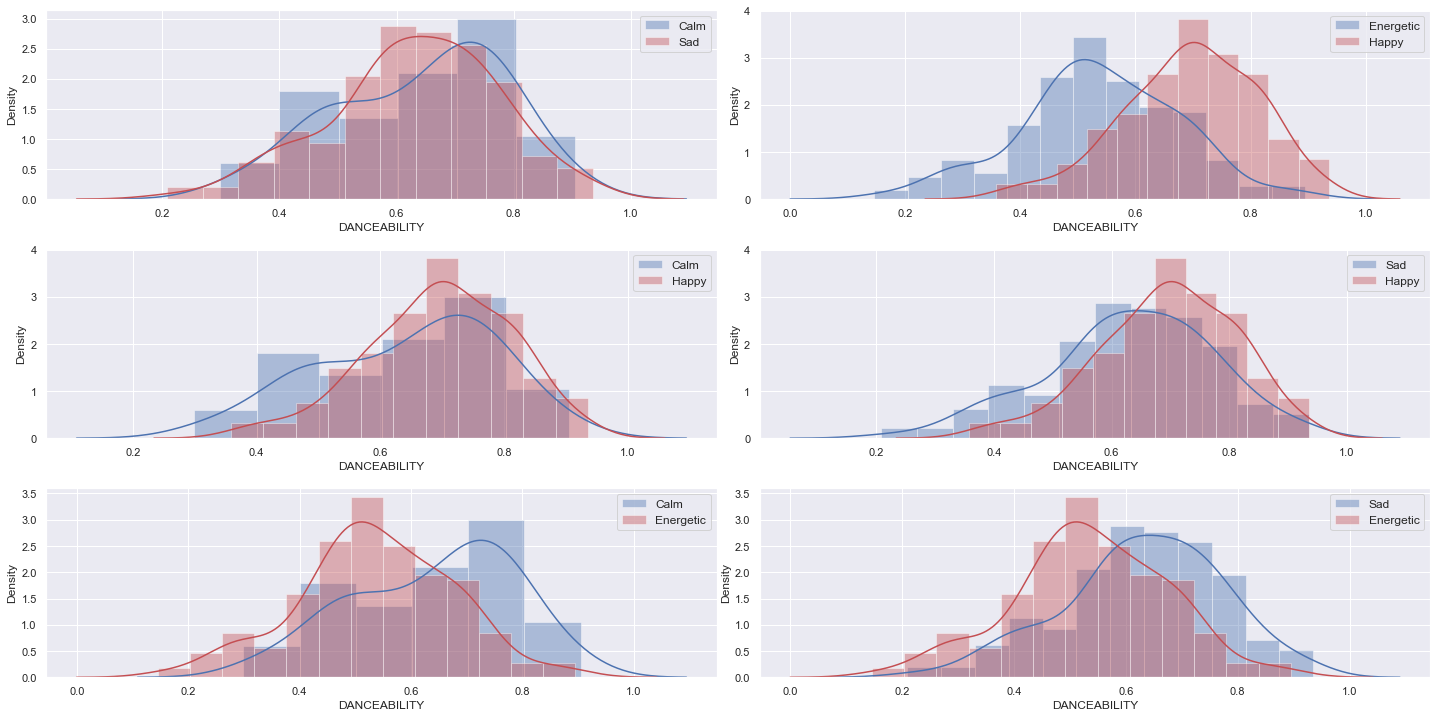

In [6]:
#set figure size
sns.set(rc={'figure.figsize':(20,13)})

#Danceability
plt.subplot(421)
sns.distplot(calm['Danceability'], label='Calm')
sns.distplot(sad['Danceability'], color='r', label='Sad')
plt.xlabel('DANCEABILITY', fontsize=12)
plt.legend(fontsize=12)

#Danceability2
plt.subplot(422)
sns.distplot(energetic['Danceability'], label='Energetic')
sns.distplot(happy['Danceability'], color='r', label='Happy')
plt.xlabel('DANCEABILITY', fontsize=12)
plt.legend(fontsize=12)

#Danceability3
plt.subplot(423)
sns.distplot(calm['Danceability'], label='Calm')
sns.distplot(happy['Danceability'], color='r', label='Happy')
plt.xlabel('DANCEABILITY', fontsize=12)
plt.legend(fontsize=12)

#Danceability4
plt.subplot(424)
sns.distplot(sad['Danceability'], label='Sad')
sns.distplot(happy['Danceability'], color='r', label='Happy')
plt.xlabel('DANCEABILITY', fontsize=12)
plt.legend(fontsize=12)

#Danceability5
plt.subplot(425)
sns.distplot(calm['Danceability'], label='Calm')
sns.distplot(energetic['Danceability'], color='r', label='Energetic')
plt.xlabel('DANCEABILITY', fontsize=12)
plt.legend(fontsize=12)

#Danceability6
plt.subplot(426)
sns.distplot(sad['Danceability'], label='Sad')
sns.distplot(energetic['Danceability'], color='r', label='Energetic')
plt.xlabel('DANCEABILITY', fontsize=12)
plt.legend(fontsize=12)

#-----------------------------------------------------------

plt.tight_layout()
plt.show()

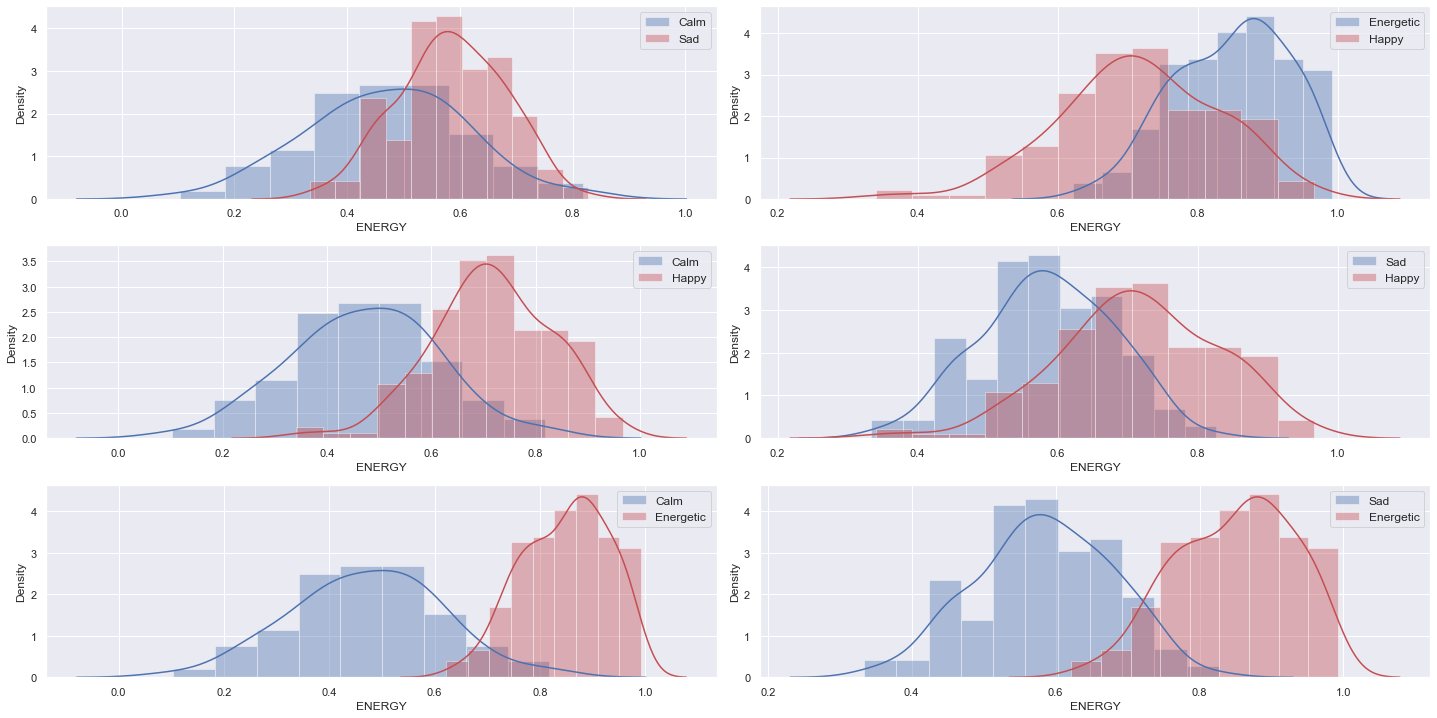

In [7]:
#set figure size
sns.set(rc={'figure.figsize':(20,13)})

#Energy1
plt.subplot(421)
sns.distplot(calm['Energy'], label='Calm')
sns.distplot(sad['Energy'], color='r', label='Sad')
plt.xlabel('ENERGY', fontsize=12)
plt.legend(fontsize=12)

#Energy2
plt.subplot(422)
sns.distplot(energetic['Energy'], label='Energetic')
sns.distplot(happy['Energy'], color='r', label='Happy')
plt.xlabel('ENERGY', fontsize=12)
plt.legend(fontsize=12)

#Energy3
plt.subplot(423)
sns.distplot(calm['Energy'], label='Calm')
sns.distplot(happy['Energy'], color='r', label='Happy')
plt.xlabel('ENERGY', fontsize=12)
plt.legend(fontsize=12)

#Energy4
plt.subplot(424)
sns.distplot(sad['Energy'], label='Sad')
sns.distplot(happy['Energy'], color='r', label='Happy')
plt.xlabel('ENERGY', fontsize=12)
plt.legend(fontsize=12)

#Energy5
plt.subplot(425)
sns.distplot(calm['Energy'], label='Calm')
sns.distplot(energetic['Energy'], color='r', label='Energetic')
plt.xlabel('ENERGY', fontsize=12)
plt.legend(fontsize=12)

#Energy6
plt.subplot(426)
sns.distplot(sad['Energy'], label='Sad')
sns.distplot(energetic['Energy'], color='r', label='Energetic')
plt.xlabel('ENERGY', fontsize=12)
plt.legend(fontsize=12)

#-----------------------------------------------------------

plt.tight_layout()
plt.show()

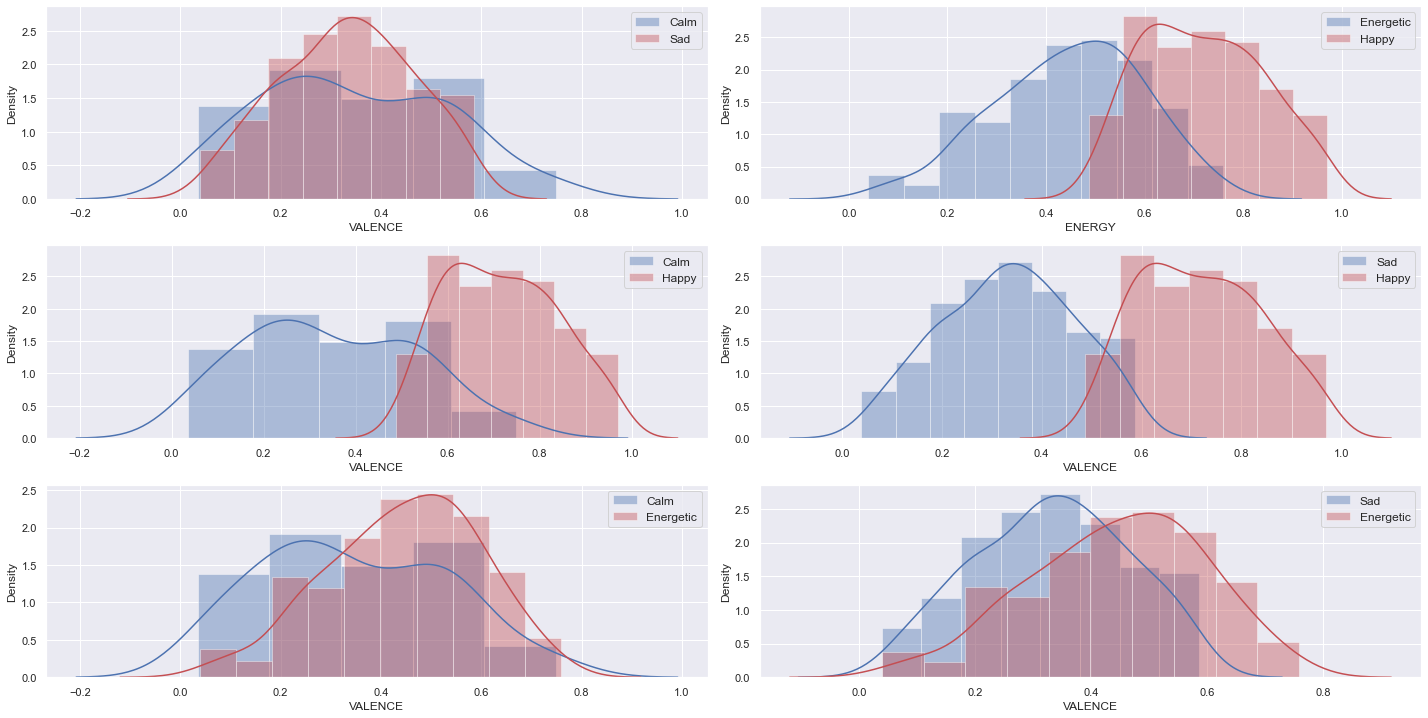

In [8]:
#set figure size
sns.set(rc={'figure.figsize':(20,13)})

#Valence1
plt.subplot(421)
sns.distplot(calm['Valence'], label='Calm')
sns.distplot(sad['Valence'], color='r', label='Sad')
plt.xlabel('VALENCE', fontsize=12)
plt.legend(fontsize=12)

#Valence2
plt.subplot(422)
sns.distplot(energetic['Valence'], label='Energetic')
sns.distplot(happy['Valence'], color='r', label='Happy')
plt.xlabel('ENERGY', fontsize=12)
plt.legend(fontsize=12)

#Valence3
plt.subplot(423)
sns.distplot(calm['Valence'], label='Calm')
sns.distplot(happy['Valence'], color='r', label='Happy')
plt.xlabel('VALENCE', fontsize=12)
plt.legend(fontsize=12)

#Valence4
plt.subplot(424)
sns.distplot(sad['Valence'], label='Sad')
sns.distplot(happy['Valence'], color='r', label='Happy')
plt.xlabel('VALENCE', fontsize=12)
plt.legend(fontsize=12)

#Valence5
plt.subplot(425)
sns.distplot(calm['Valence'], label='Calm')
sns.distplot(energetic['Valence'], color='r', label='Energetic')
plt.xlabel('VALENCE', fontsize=12)
plt.legend(fontsize=12)

#Valence6
plt.subplot(426)
sns.distplot(sad['Valence'], label='Sad')
sns.distplot(energetic['Valence'], color='r', label='Energetic')
plt.xlabel('VALENCE', fontsize=12)
plt.legend(fontsize=12)

#-----------------------------------------------------------

plt.tight_layout()
plt.show()

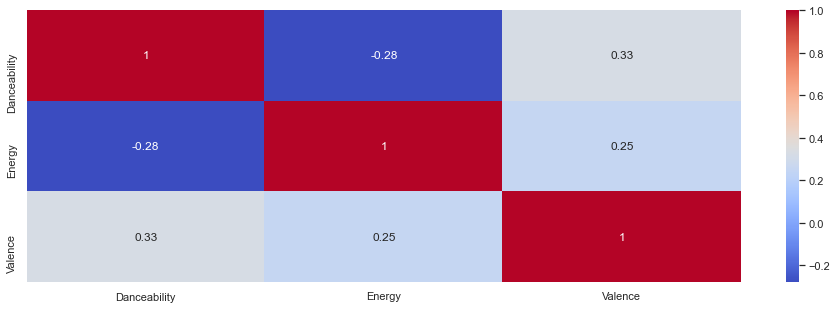

In [9]:
all_numeric = df.drop(['Name', 'Artist', 'Tempo', 'Loudness', 'Mood'], axis=1)
plt.figure(figsize = (16,5))
sns.heatmap(all_numeric.corr(), cmap="coolwarm", annot=True)
plt.show()

In [10]:
X = np.array([[df.Danceability, df.Energy, df.Loudness, df.Valence, df.Tempo]])
y = np.array(df['Mood'].values.tolist())
X = X.reshape(X.shape[1:])
X = X.transpose()

In [12]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size= 0.2, random_state=42)

target = pd.DataFrame({'Mood':df['Mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,Mood,encode
20,Calm,0
1,Energetic,1
0,Happy,2
6,Sad,3


In [13]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = accuracy_score(y_pred, y_test) * 100
print("Random Forest:", acc_randomforest)

Random Forest: 82.35294117647058


In [14]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_cv = GridSearchCV(estimator=randomforest, param_grid=param_grid)
rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)

y_pred = rf_cv.predict(X_test)
acc_rfcv = accuracy_score(y_pred, y_test)*100
print("Random Forest GridSearchCV:", acc_rfcv)

{'max_features': 'auto', 'n_estimators': 200}
Random Forest GridSearchCV: 83.19327731092437
